In [1]:
import pandas as pd 
import numpy as nm 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [2]:
data = pd.read_csv("bank-full.csv")
data.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [16]:
data.shape

(45211, 17)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [18]:
data.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [20]:
data[data.isna().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


In [22]:
data['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [5]:

# One-Hot Encoding of categrical variables
data1=pd.get_dummies(data,columns=['job','marital','education','contact','poutcome','month'])
data1


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  Target               45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [34]:

# Custom Binary Encoding of Binary o/p variables 
data1['default'] = nm.where(data1['default'].astype(str).str.contains("yes"), 1, 0)
data1['housing'] = nm.where(data1['housing'].astype(str).str.contains("yes"), 1, 0)
data1['loan'] = nm.where(data1['loan'].astype(str).str.contains("yes"), 1, 0)
data1['Target'] = nm.where(data1['Target'].astype(str).str.contains("yes"), 1, 0)
data1


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,0,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,0,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,0,0,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,0,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()


In [39]:
# Dividing our data into input and output variables
x=pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
y=data1.iloc[:,10]


In [40]:
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,0,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,0,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,0,0,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,0,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 45211, dtype: int32

In [42]:
#Logistic regression and fit the model
data1= LogisticRegression()
data1.fit(x,y)
# classifier.write_to_pickle('path of file.pkl')

C:\Users\tanuc\desktop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
data1.coef_

array([[-1.82472459e-02,  0.00000000e+00,  2.11319586e-05,
         0.00000000e+00,  0.00000000e+00, -1.01434436e-02,
         3.63653284e-03, -4.10016819e-01,  1.87252079e-03,
        -1.65290993e-01, -3.93582919e-02, -3.45654795e-01,
        -3.61590155e-02, -9.94972017e-03,  9.61190295e-03,
         2.23710047e-01, -2.06041953e-02, -1.21115960e-01,
         4.17457818e-02, -9.36737788e-02,  5.33883559e-03,
         4.04511884e-03,  2.05156332e-02, -2.34234760e-01,
        -1.68344943e-01, -9.29212671e-02, -3.71122209e-01,
         6.24518812e-02,  1.95275251e-02,  1.21027294e-01,
         7.00440054e-02, -5.73135370e-01, -1.79364581e-01,
        -4.12172233e-02,  4.13084358e-01, -5.74566624e-01,
         4.92149128e-02,  4.31595092e-02,  3.83387246e-02,
        -1.77921800e-02, -1.45776717e-02, -1.07151044e-01,
        -6.87971325e-02,  1.14724162e-01, -5.74956484e-01,
        -7.57089904e-02,  1.31734313e-01,  9.97478113e-02]])

In [47]:
#Predict for X dataset
# classifer.read_pickle_file('path of file.pkl')
y_pred = data1.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [49]:
data1.predict_proba(x)

array([[0.94232106, 0.05767894],
       [0.96933992, 0.03066008],
       [0.97165692, 0.02834308],
       ...,
       [0.44370337, 0.55629663],
       [0.94815888, 0.05184112],
       [0.94146042, 0.05853958]])

In [51]:
data1.predict_proba(X)[:,0]

C:\Users\tanuc\desktop\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Target
Feature names seen at fit time, yet now missing:
- age

  warnings.warn(message, FutureWarning)


array([0.98902081, 0.97928378, 0.95703776, ..., 1.        , 0.99869683,
       1.        ])

In [52]:
data1.predict_proba(X)[:,1]

C:\Users\tanuc\desktop\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Target
Feature names seen at fit time, yet now missing:
- age

  warnings.warn(message, FutureWarning)


array([1.09791938e-02, 2.07162195e-02, 4.29622377e-02, ...,
       1.19320674e-38, 1.30317424e-03, 3.17871059e-36])

In [54]:
y_pred_df = pd.DataFrame({'actual': Y,
                         'prob': data1.predict_proba(X)[:,1],
                         'predicted': y_pred}) #classifier.predict(X)

C:\Users\tanuc\desktop\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Target
Feature names seen at fit time, yet now missing:
- age

  warnings.warn(message, FutureWarning)


In [55]:
y_pred_df

,actual,prob,predicted
0,58,1.097919e-02,0
1,44,2.071622e-02,0
2,33,4.296224e-02,0
3,47,3.974700e-02,0
4,33,2.095341e-02,0
...,...,...,...
45206,51,1.977025e-05,1
45207,71,5.861600e-03,0
45208,72,1.193207e-38,1
45209,57,1.303174e-03,0


In [56]:
y_pred_df['actual'] == y_pred_df['predicted']

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [57]:
y_pred_df['correct'] = y_pred_df['actual'] == y_pred_df['predicted']
y_pred_df

,actual,prob,predicted,correct
0,58,1.097919e-02,0,False
1,44,2.071622e-02,0,False
2,33,4.296224e-02,0,False
3,47,3.974700e-02,0,False
4,33,2.095341e-02,0,False
...,...,...,...,...
45206,51,1.977025e-05,1,False
45207,71,5.861600e-03,0,False
45208,72,1.193207e-38,1,False
45209,57,1.303174e-03,0,False


In [58]:
y_pred_df[y_pred_df['correct']==True]

,actual,prob,predicted,correct


In [59]:
y_pred_df[y_pred_df['correct']==False]

,actual,prob,predicted,correct
0,58,1.097919e-02,0,False
1,44,2.071622e-02,0,False
2,33,4.296224e-02,0,False
3,47,3.974700e-02,0,False
4,33,2.095341e-02,0,False
...,...,...,...,...
45206,51,1.977025e-05,1,False
45207,71,5.861600e-03,0,False
45208,72,1.193207e-38,1,False
45209,57,1.303174e-03,0,False


In [60]:
y_pred_df['correct'].value_counts()

False    45211
Name: correct, dtype: int64

In [61]:
y_pred_df['correct'].mean()

0.0

# confusion Matrix

In [62]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y, y_pred)

print (confusion_matrix)

[[39204   718]
 [ 4223  1066]]


<AxesSubplot:>

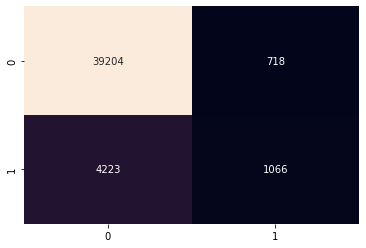

In [63]:
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cbar = False)

In [64]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00      12.0
          19       0.00      0.00      0.00      35.0
          20       0.00      0.00      0.00      50.0
          21       0.00      0.00      0.00      79.0
          22       0.00      0.00      0.00     129.0
          23       0.00      0.00      0.00     202.0
          24       0.00      0.00      0.00     302.0
          25       0.00      0.00      0.00     527.0
          26       0.00      0.00      0.00     805.0
          27       0.00      0.00      0.00     909.0
          28       0.00      0.00      0.00    1038.0
          29       0.00      0.00      0.00    1185.0
          30       0.00      0.00      0.00    1757.0
          31       0.00      0.00      0.00    1996.0
          32       0.00      0.00      0.00    2085.0
          33       0.00    

C:\Users\tanuc\desktop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tanuc\desktop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tanuc\desktop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tanuc\desktop\anaconda3\lib\si

In [65]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 45211, dtype: int32

In [67]:
data1.predict_proba(x)

array([[0.94232106, 0.05767894],
       [0.96933992, 0.03066008],
       [0.97165692, 0.02834308],
       ...,
       [0.44370337, 0.55629663],
       [0.94815888, 0.05184112],
       [0.94146042, 0.05853958]])

In [68]:
data1.predict_proba(X)[:,1]

C:\Users\tanuc\desktop\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Target
Feature names seen at fit time, yet now missing:
- age

  warnings.warn(message, FutureWarning)


array([1.09791938e-02, 2.07162195e-02, 4.29622377e-02, ...,
       1.19320674e-38, 1.30317424e-03, 3.17871059e-36])

# ROC Curve

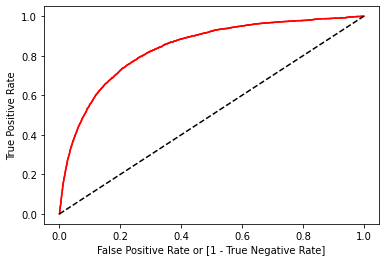

auc accuracy: 0.5917826583543335


In [71]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,data1.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)
